© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0

# 03 Processing Data Type 1 - Vector

This notebook illustrates how to process data of Data Type 1 - Vector. Even though the coordinate reference system is the same, the underlying grid must be adapted. 

## Importing Libraries

In [1]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

import sys 
sys.path.insert(0, '../pyhd/')
import processing

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading Sample Data

The sample data is loaded using `GeoPandas`.

In [2]:
data = gpd.read_file('../data/Data_Type_I_Vector.shp')
data.head()

,OBJECTID,CellCode,WOHNGEB_WB,NWOHNGEB_W,AGS,EBZ_WG,EBZ_NWG,RW_WW_p_EB,RW_WW_WBED,Shape_Leng,Shape_Area,geometry
0,9317.0,100mN30768E40412,0.0,0.0,NaN,0.0,0.0,0.0,0.0,400.054828,10002.740522,"POLYGON ((3729805.719 2671301.155, 3729805.706..."
1,9318.0,100mN30768E40413,0.0,0.0,05334002,0.0,0.0,0.0,0.0,400.054828,10002.740522,"POLYGON ((3729902.302 2671301.203, 3729902.288..."
2,9319.0,100mN30768E40414,0.0,0.0,05334002,0.0,0.0,0.0,0.0,400.054426,10002.720388,"POLYGON ((3729998.884 2671301.252, 3729998.871..."
3,9320.0,100mN30768E40415,0.0,0.0,05334002,0.0,0.0,0.0,0.0,400.054527,10002.725454,"POLYGON ((3730095.466 2671301.300, 3730095.453..."
4,9321.0,100mN30768E40416,0.0,0.0,05334002,0.0,0.0,0.0,0.0,400.054324,10002.715318,"POLYGON ((3730192.049 2671301.348, 3730192.036..."


In [3]:
from shapely.geometry import MultiPolygon

test = gpd.GeoDataFrame(geometry=[MultiPolygon([data.geometry.values])], crs='EPSG:3034')
test

,geometry
0,"MULTIPOLYGON (((3729805.719 2671301.155, 37298..."


<Axes: >

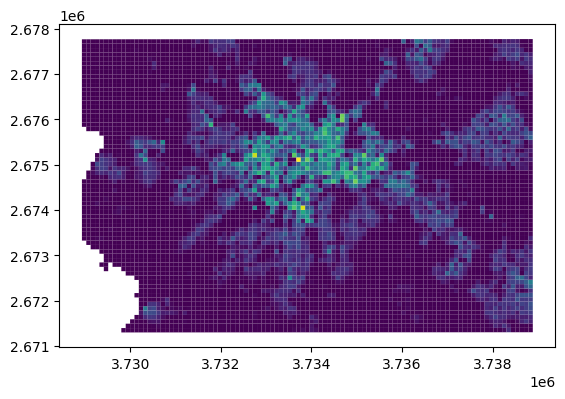

In [4]:
data.plot(column='WOHNGEB_WB')

## Inspect CRS

We are inspecting the CRS and see that is does match with the desired CRS `EPSG:3034`.

In [5]:
data.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

## Creating GeoDataFrame Outline from Vector

For further processing, we are creating an outline `GeoDataFrame` from the `total_bounds` of the vector data.

In [6]:
gdf = processing.create_outline(data)
gdf

,geometry
0,"POLYGON ((3738884.398 2671301.155, 3738884.398..."


## Loading Interreg Mask

We are loading the previously created 10km mask. 

In [7]:
mask_10km = gpd.read_file('../data/Interreg_NWE_mask_10km_3034.shp')
mask_10km

,FID,geometry
0,0,"POLYGON ((2651470.877 2955999.353, 2651470.877..."
1,1,"POLYGON ((2651470.877 2965999.353, 2651470.877..."
2,2,"POLYGON ((2651470.877 2975999.353, 2651470.877..."
3,3,"POLYGON ((2651470.877 2985999.353, 2651470.877..."
4,4,"POLYGON ((2651470.877 2995999.353, 2651470.877..."
...,...,...
9225,9225,"POLYGON ((4141470.877 2605999.353, 4141470.877..."
9226,9226,"POLYGON ((4141470.877 2615999.353, 4141470.877..."
9227,9227,"POLYGON ((4151470.877 2585999.353, 4151470.877..."
9228,9228,"POLYGON ((4151470.877 2595999.353, 4151470.877..."


In [8]:
mask_10km.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

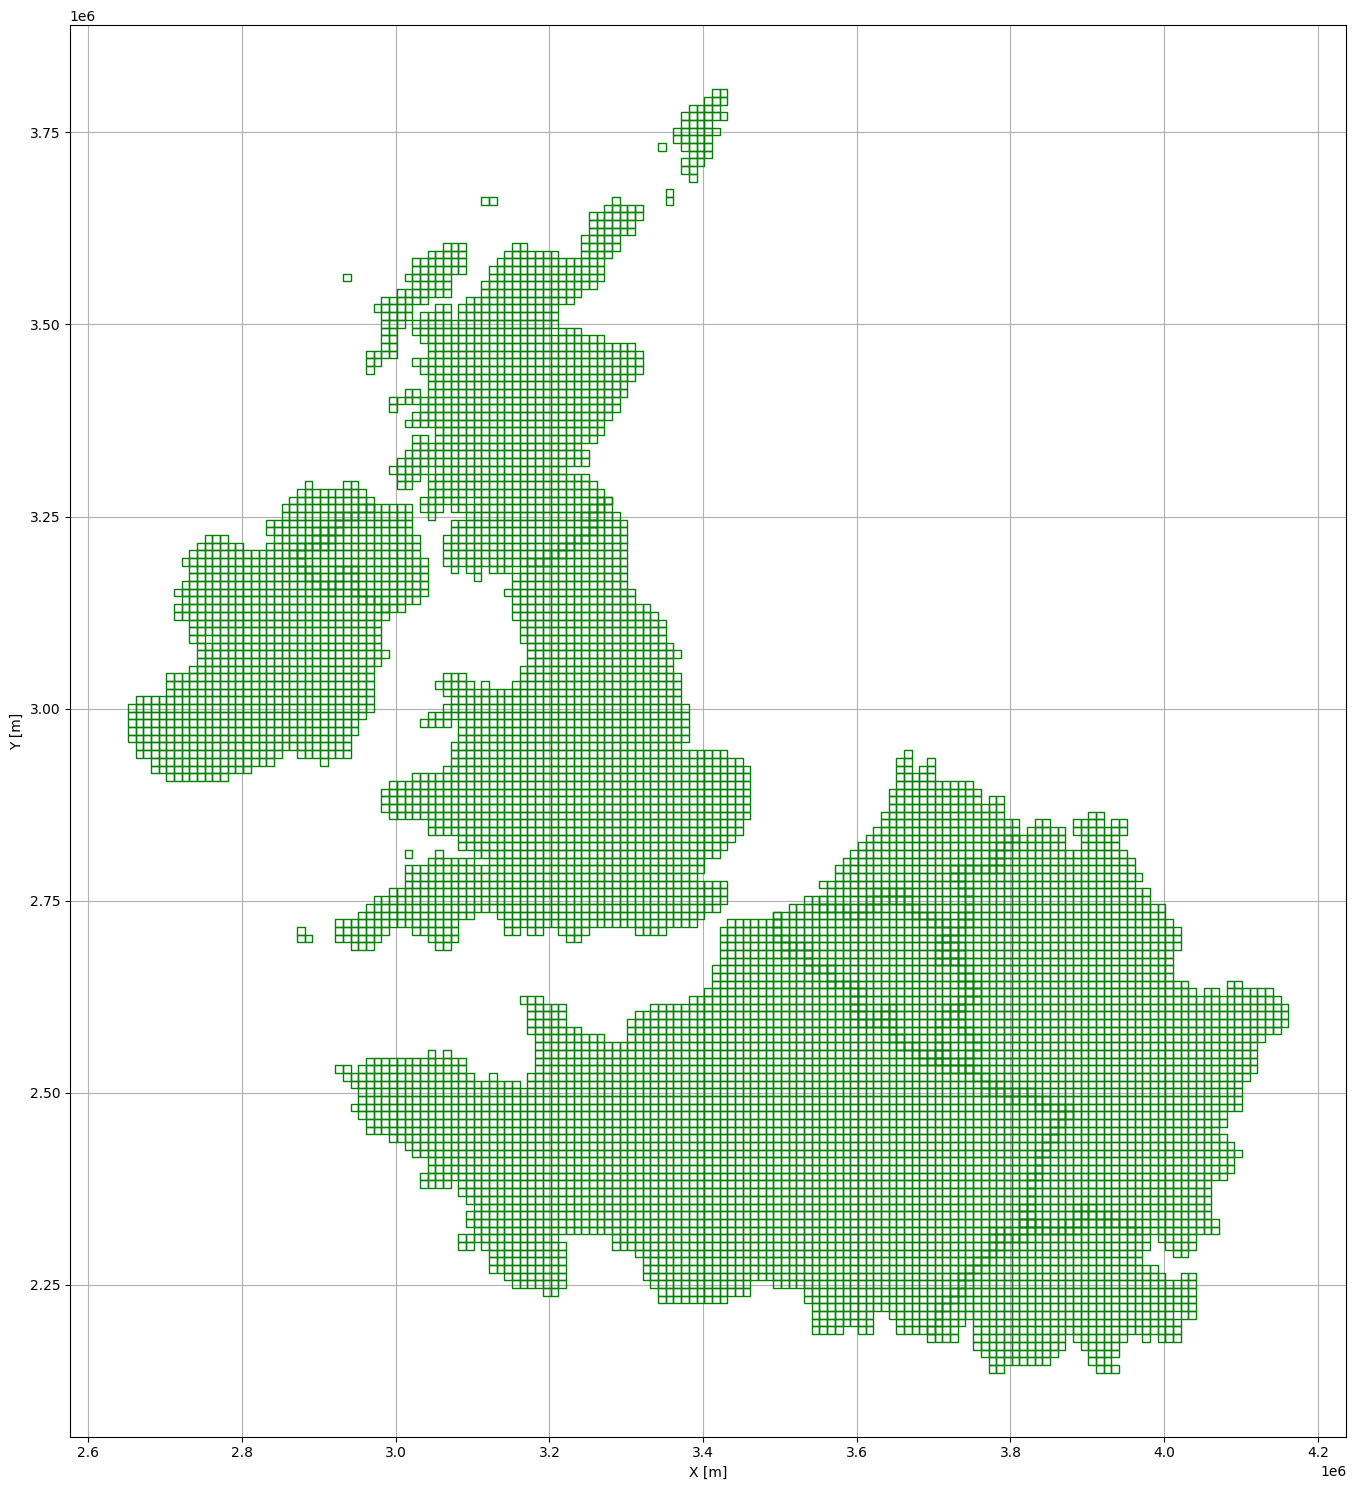

In [9]:
fig, ax = plt.subplots(figsize=(15,15))
mask_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Crop Mask to Data Limits

The 10 km cells that intersect with the data outline are selected. 

In [10]:
mask_10km_cropped = mask_10km.sjoin(gdf).reset_index()[['geometry']]
mask_10km_cropped

,geometry
0,"POLYGON ((3721470.877 2665999.353, 3721470.877..."
1,"POLYGON ((3731470.877 2665999.353, 3731470.877..."
2,"POLYGON ((3721470.877 2665999.353, 3721470.877..."
3,"POLYGON ((3721470.877 2675999.353, 3721470.877..."
4,"POLYGON ((3731470.877 2675999.353, 3731470.877..."
5,"POLYGON ((3721470.877 2665999.353, 3721470.877..."
6,"POLYGON ((3721470.877 2675999.353, 3721470.877..."
7,"POLYGON ((3731470.877 2665999.353, 3731470.877..."
8,"POLYGON ((3731470.877 2675999.353, 3731470.877..."


## Plotting the Cropped Mask

The cropped mask and the data outline are plotted using `matplotlib`. 

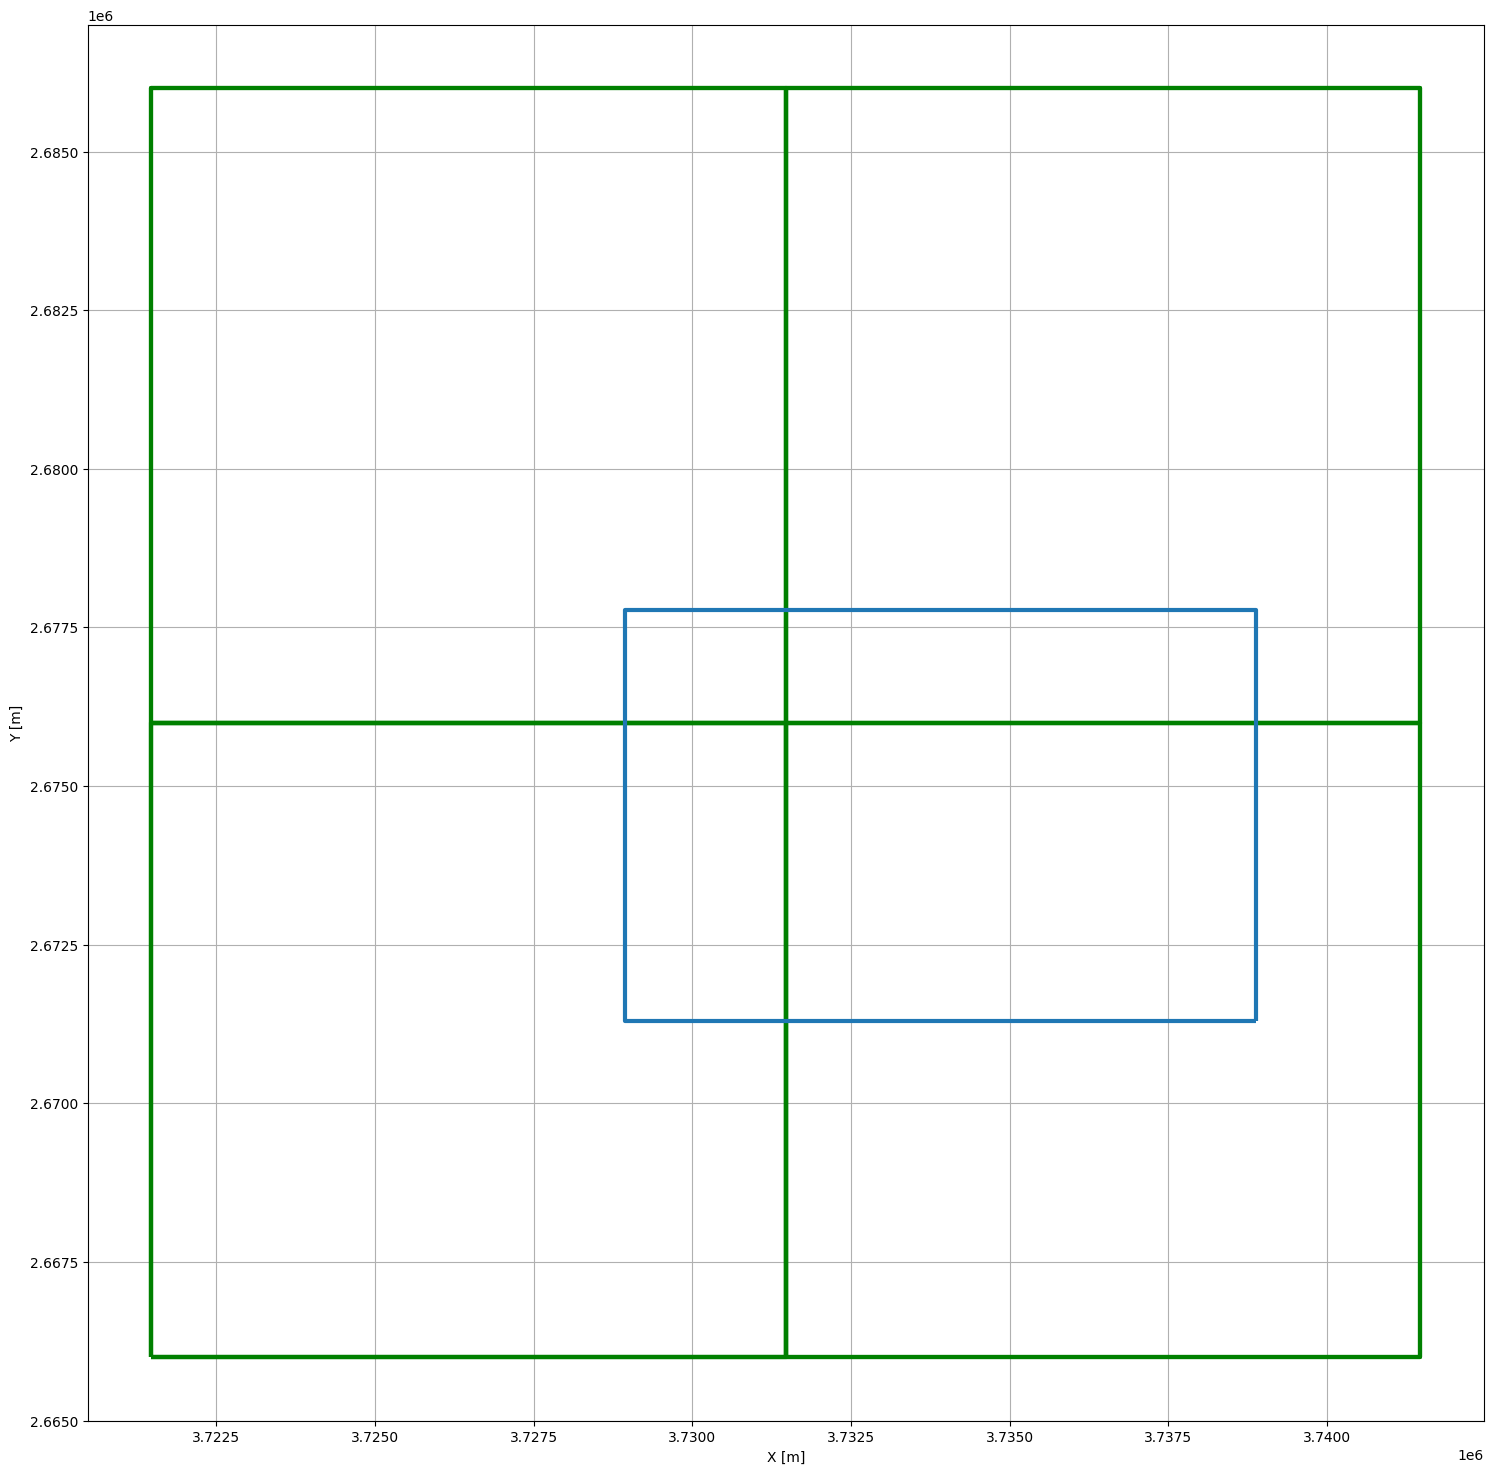

In [11]:
fig, ax = plt.subplots(figsize=(15,15))
mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
gdf.boundary.plot(ax=ax, linewidth=3)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Creating mask from cropped mask

Here, the final mask with a width and height of 100 m is created. 

In [12]:
mask_100m_cropped = processing.create_polygon_mask(gdf=mask_10km_cropped, 
                                                   step_size=100,
                                                   crop_gdf=True)
mask_100m_cropped

,geometry
0,"POLYGON ((3721470.877 2665999.353, 3721570.877..."
1,"POLYGON ((3721470.877 2666099.353, 3721570.877..."
2,"POLYGON ((3721470.877 2666199.353, 3721570.877..."
3,"POLYGON ((3721470.877 2666299.353, 3721570.877..."
4,"POLYGON ((3721470.877 2666399.353, 3721570.877..."
...,...
91804,"POLYGON ((3741370.877 2685499.353, 3741470.877..."
91805,"POLYGON ((3741370.877 2685599.353, 3741470.877..."
91806,"POLYGON ((3741370.877 2685699.353, 3741470.877..."
91807,"POLYGON ((3741370.877 2685799.353, 3741470.877..."


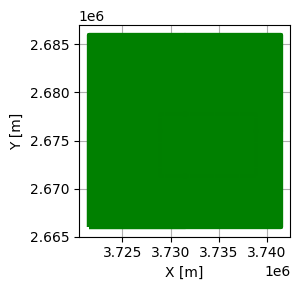

In [13]:
fig, ax = plt.subplots(figsize=(5,3))
mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
gdf.boundary.plot(ax=ax, linewidth=3)
mask_100m_cropped.boundary.plot(ax=ax, linewidth=0.5, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

#plt.savefig('../images/Data_Type_1_Outline.png', dpi=300)

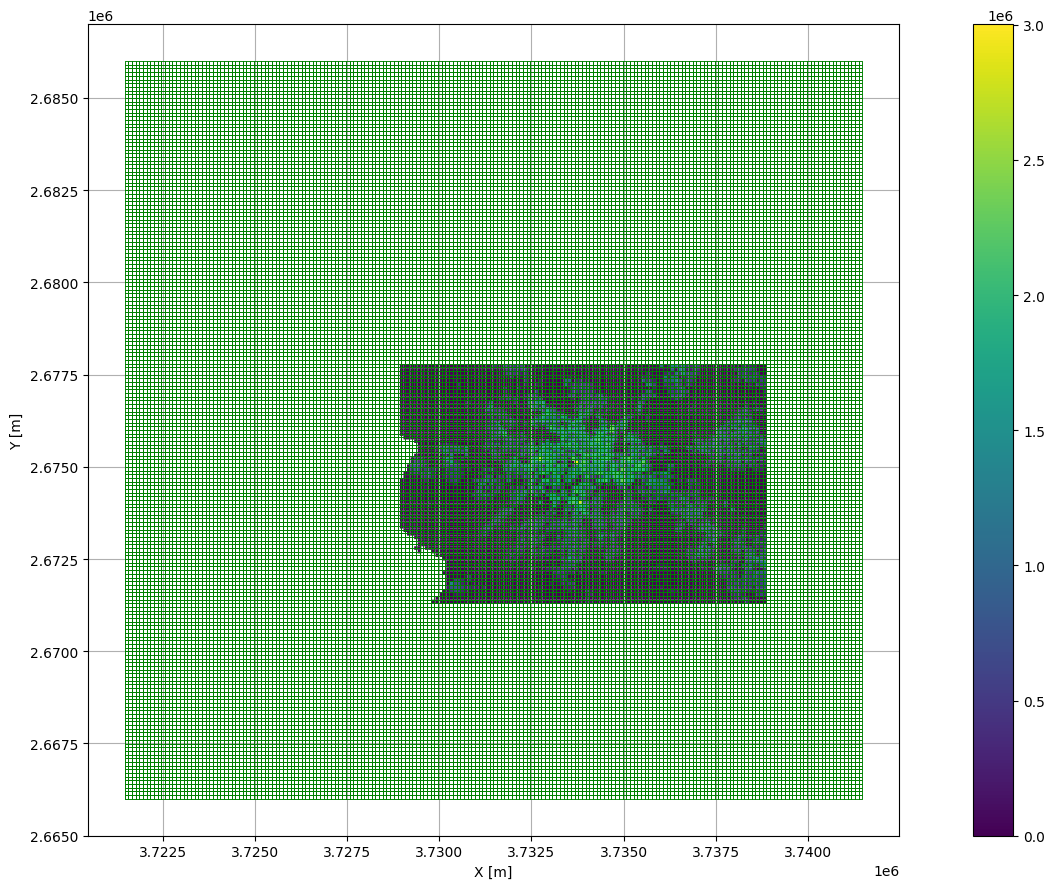

In [14]:
fig, ax = plt.subplots(figsize=(15,9))
# mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
# gdf.to_crs('EPSG:3034').boundary.plot(ax=ax, linewidth=3)
mask_100m_cropped.boundary.plot(ax=ax, linewidth=0.5, color='green')
data.plot(ax=ax, column='WOHNGEB_WB', legend=True)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Calculate Heat Demand

With the vector data and the 100 m mask, we can now directly calculate the heat demand using `calculate_hd`. 

In [15]:
hd_gdf = data
mask_gdf = mask_100m_cropped

In [16]:
gdf_hd = processing.calculate_hd(hd_gdf, 
                                 mask_gdf, 
                                 'WOHNGEB_WB')
gdf_hd 

,HD,geometry
0,0.000000,"POLYGON ((3728870.877 2673299.353, 3728970.877..."
1,0.000000,"POLYGON ((3728870.877 2673399.353, 3728970.877..."
2,0.000000,"POLYGON ((3728870.877 2673499.353, 3728970.877..."
3,0.000000,"POLYGON ((3728870.877 2673599.353, 3728970.877..."
4,0.000000,"POLYGON ((3728870.877 2673699.353, 3728970.877..."
...,...,...
6349,95906.514292,"POLYGON ((3738870.877 2677299.353, 3738970.877..."
6350,60661.270424,"POLYGON ((3738870.877 2677399.353, 3738970.877..."
6351,0.000000,"POLYGON ((3738870.877 2677499.353, 3738970.877..."
6352,0.000000,"POLYGON ((3738870.877 2677599.353, 3738970.877..."


<Axes: >

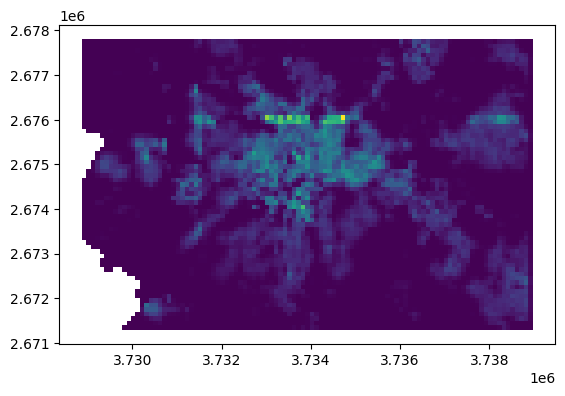

In [17]:
gdf_hd.plot(column='HD')

## Rasterizing Vector Data

The vector data will be rasterized and saved to file.

In [18]:
processing.rasterize_gdf_hd(gdf_hd, 
                     path_out='../data/Data_Type_I_Vector.tif',
                     crs = 'EPSG:3034', 
                     xsize = 100,
                     ysize = 100)

## Opening and plotting raster
The final raster can now be opened and plotted. 

In [19]:
raster = rasterio.open('../data/Data_Type_I_Vector.tif')

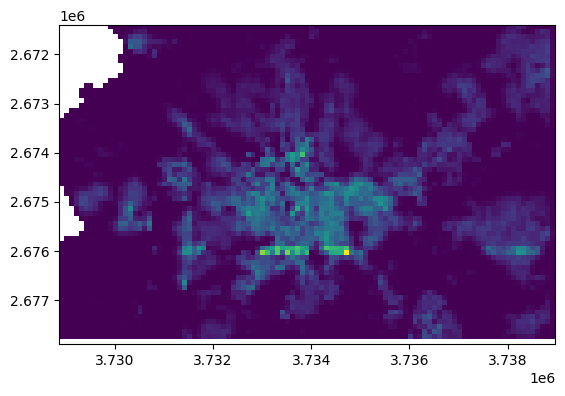

In [20]:
show(raster);